In [72]:
%reload_kedro

2019-12-30 15:32:43,853 - root - INFO - ** Kedro project One Two Trip
2019-12-30 15:32:43,854 - root - INFO - Defined global variable `context` and `catalog`


In [83]:
import numpy as np

In [73]:

from kedro.config import ConfigLoader

conf_paths = ['conf/base','conf/local']
conf_loader = ConfigLoader(conf_paths)
conf_credentials = conf_loader.get('credentials*','credentials*/**')
conf_parameters = conf_loader.get('parameters*','parameters*/**')
conf_catalog = conf_loader.get('catalog*', 'catalog*/**')

cols_target = conf_parameters['model']['cols_target']
col_id = conf_parameters['model']['col_id']
col_user = conf_parameters['model']['col_user']

params = conf_parameters['lightgbm']['params']

In [86]:


# cols_all = list(set(df_test.columns) - set(cols_target) - set([col_id]) - set([col_user]))

cols_all = df_train.columns.values
cols_all = np.delete(cols_all, np.argwhere(cols_all == col_id))
cols_all = np.delete(cols_all, np.argwhere(cols_all == col_user))
cols_all = cols_all[~np.isin(cols_all, cols_target)]

In [88]:
21/9*260

606.6666666666667

In [87]:
cols_all

array(['field0', 'field1', 'field2', 'field3', 'field4', 'field5',
       'field6', 'field7', 'field8', 'field9', 'field10', 'field11',
       'field12', 'field13', 'field14', 'field15', 'field16', 'field17',
       'field18', 'field19', 'field20', 'field21', 'field22', 'field23',
       'field24', 'field25', 'field26', 'field27', 'field28', 'field29',
       'indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25', 'mean_byuser_field13',
       'mean_byuser_field18', 'mean_byuser_field10',
       'mean_byuser_field24', 'mean_byuser_indicator_goal24',
       'mean_byuser_indicator_goal23', 'mean_byuser_field1',
       'mean_byuser_field8', 'mean_byuser_field17', 'mean_byuser_field20',
       'mean_byuser_field19', 'mean_byuser_indicator_goal25',
       'mean_byuser_field2', 'mean_byuser_field15', 'mean_byuser_field23',
       'mean_byuser_indicator_goal21', 'mean_byuser_field5',
       'mean_byuser_field27', 'mean_byuser_field0', 'mean_b

In [80]:
np.delete(cols_all, np.argwhere(cols_all == cols_target))

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


array(['field0', 'field1', 'field2', 'field3', 'field4', 'field5',
       'field6', 'field7', 'field8', 'field9', 'field10', 'field11',
       'field12', 'field13', 'field14', 'field15', 'field16', 'field17',
       'field18', 'field19', 'field20', 'field21', 'field22', 'field23',
       'field24', 'field25', 'field26', 'field27', 'field28', 'field29',
       'indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25', 'goal21', 'goal22',
       'goal23', 'goal24', 'goal25', 'goal1', 'mean_byuser_field13',
       'mean_byuser_field18', 'mean_byuser_field10',
       'mean_byuser_field24', 'mean_byuser_indicator_goal24',
       'mean_byuser_indicator_goal23', 'mean_byuser_field1',
       'mean_byuser_field8', 'mean_byuser_field17', 'mean_byuser_field20',
       'mean_byuser_field19', 'mean_byuser_indicator_goal25',
       'mean_byuser_field2', 'mean_byuser_field15', 'mean_byuser_field23',
       'mean_byuser_indicator_goal21', 'mean_byuser_fi

In [74]:
df_train

NameError: name 'df_train' is not defined

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 9999

In [10]:
train = catalog.load('train')
test = catalog.load('test')
submission = catalog.load('submission')

2019-12-30 13:44:52,957 - kedro.io.data_catalog - INFO - Loading data from `train` (CSVLocalDataSet)...
2019-12-30 13:44:53,430 - kedro.io.data_catalog - INFO - Loading data from `test` (CSVLocalDataSet)...
2019-12-30 13:44:54,455 - kedro.io.data_catalog - INFO - Loading data from `submission` (CSVLocalDataSet)...


In [77]:
df_train = catalog.load('df_train')

2019-12-30 15:33:33,915 - kedro.io.data_catalog - INFO - Loading data from `df_train` (PickleLocalDataSet)...


In [71]:
df_test.sort_index()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,mean_byuser_field13,mean_byuser_field18,mean_byuser_field10,mean_byuser_field24,mean_byuser_indicator_goal24,mean_byuser_indicator_goal23,mean_byuser_field1,mean_byuser_field8,mean_byuser_field17,mean_byuser_field20,mean_byuser_field19,mean_byuser_indicator_goal25,mean_byuser_field2,mean_byuser_field15,mean_byuser_field23,mean_byuser_indicator_goal21,mean_byuser_field5,mean_byuser_field27,mean_byuser_field0,mean_byuser_field29,mean_byuser_indicator_goal22,mean_byuser_field3,mean_byuser_field4,mean_byuser_field14,mean_byuser_field25,mean_byuser_field12,mean_byuser_field21,mean_byuser_field16,mean_byuser_field28,mean_byuser_field7,mean_byuser_field26,mean_byuser_field11,mean_byuser_field9,mean_byuser_field22,mean_byuser_field6
0,0,3a6a6af55e097d3f92705936a7ea3ca8aef651f5966832...,0,-0.548937,10,10,1,1,0,1,1,0,1,23,2,23,-0.521242,1,1,1,2,2,3,1,20,15,1,1,1,1,0,4,1,1,0,0,1,13.500000,3.0,1.000000,1.0,0.0,0.5,-0.548937,1.0,1.0,4.500000,2.0,1.0,10.0,1.0,14.500000,1.0,0.500000,1.0,1.000000,4.0,1.0,10.000000,1.5,-0.521242,1.0,2.0,1.000000,1.500000,0.0,1.0,1.0,21.000000,0.0,28.000000,0.0
1,1,2df10f61960163da94a4294773ed9c865296e37c330304...,82,-0.626508,3,4,3,0,0,1,1,0,1,14,4,3,-0.661308,1,19,1,6,1,4,2,17,14,1,1,1,1,0,1,1,1,0,1,1,3.666667,3.0,0.666667,1.0,1.0,0.0,-0.626508,1.0,1.0,3.666667,1.0,1.0,9.0,1.0,16.666667,1.0,0.333333,1.0,29.333333,3.0,1.0,5.666667,2.0,-0.661308,1.0,3.0,1.333333,19.333333,0.0,1.0,1.0,14.333333,0.0,11.666667,0.0
2,2,20dc3fec5b5eb42fbfe08119063c3a0010a73c7ec94abb...,0,-0.548937,6,8,1,1,0,2,1,0,1,13,4,3,-0.521242,1,39,1,1,1,5,1,101,8,1,35,1,1,0,2,1,0,0,1,1,3.000000,1.0,1.000000,1.0,1.0,0.0,-0.548937,1.0,1.0,5.000000,1.0,1.0,6.0,1.0,8.000000,1.0,0.500000,2.5,0.000000,2.0,0.0,8.000000,1.5,-0.521242,35.0,4.0,1.000000,39.000000,0.0,2.0,3.5,13.000000,0.0,101.000000,0.0
3,3,ed75b3496977bac207eccb59dc91fe9a8d6a27777a6422...,6,0.304348,7,7,2,0,10,1,0,0,0,20,19,3,0.879422,1,18,1,4,1,1,1,16,16,1,1,3,1,0,3,1,1,0,1,1,3.000000,4.5,0.000000,1.0,1.0,0.0,0.769776,0.0,1.0,1.000000,1.0,1.0,7.0,1.5,16.000000,1.0,0.500000,1.0,3.000000,3.0,1.0,7.000000,1.5,0.879422,1.0,19.0,1.000000,21.000000,0.5,1.0,3.0,17.500000,0.0,16.000000,10.0
4,4,a346d08351c5fd0bda82984ed7c8b12b6395829da5b857...,115,-0.471365,3,3,2,0,0,1,1,0,1,20,4,5,-0.661308,2,8,1,2,1,3,2,1,13,2,1,1,1,0,1,1,1,0,1,1,5.000000,4.0,1.000000,1.5,0.5,0.5,-0.548937,1.0,1.0,2.000000,1.0,1.0,7.0,1.5,16.000000,1.0,0.500000,1.0,57.500000,2.5,1.0,7.000000,1.5,-0.661308,1.0,3.0,1.500000,5.000000,0.0,1.0,1.0,19.000000,0.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455006,455006,e54d8c57b0d2b64d19c59d5068372758067921f06101e2...,0,2.553918,8,8,1,1,10,2,0,0,1,18,37,6,2.140019,2,16,1,6,4,1,1,121,7,2,41,3,1,0,3,1,1,1,1,0,6.000000,6.0,1.000000,2.0,1.0,1.0,2.553918,0.0,1.0,1.000000,4.0,0.0,8.0,2.0,7.000000,1.0,1.000000,1.0,0.000000,3.0,1.0,8.000000,1.0,2.140019,41.0,37.0,1.000000,16.000000,0.0,2.0,3.0,18.000000,0.0,121.000000,10.0
455007,455007,5af2c8b53a965915f496971f0f105393f7f9c9b0931e6b...,0,-0.238651,9,9,1,1,1,1,1,0,0,22,8,64,0.039024,1,24,1,3,1,6,1,20,23,1,1,1,1,0,3,1,1,1,1,1,64.000000,3.0,0.000000,1.0,1.0,1.0,-0.238651,1.0,1.0,6.000000,1.0,1.0,9.0,1.0,23.000000,1.0,1.000000,1.0,0.000000,3.0,1.0,9.000000,1.0,0.039024,1.0,8.0,1.000000,24.000000,0.0,1.0,1.0,22.000000,0.0,20.000000,1.0
455008,455008,255bfc6ac2f9c98d7f86e59bd72a682e7a50c2db610749...,0,-0.161080,10,11,1,1,0,1,1,0,0,16,3,3,0.179090,1,1,1,3,2,4,1,22

In [34]:
df_union = catalog.load('df_union')

2019-12-30 14:50:31,329 - kedro.io.data_catalog - INFO - Loading data from `df_union` (PickleLocalDataSet)...


In [56]:
cols = list(set(df_union.columns) - set(['goal1','goal21','goal22','goal23','goal24','goal25','userid']) - set(['orderid']))

result = df_union.groupby('userid')[cols].agg('mean')

result.columns = ['mean_byuser_' + str(i) for i in result.columns]

In [66]:
set(['orderid'])

{'orderid'}

In [64]:
cols = list(set(df_union.columns) - set(['goal1','goal21','goal22','goal23','goal24','goal25','userid']) - set(list('orderid')))
cols

['field28',
 'orderid',
 'field22',
 'field19',
 'field14',
 'field9',
 'field17',
 'field26',
 'field4',
 'field15',
 'field3',
 'field13',
 'indicator_goal23',
 'indicator_goal24',
 'field18',
 'field11',
 'field29',
 'field24',
 'field2',
 'field16',
 'indicator_goal22',
 'field7',
 'indicator_goal21',
 'indicator_goal25',
 'field25',
 'field12',
 'field23',
 'field5',
 'field10',
 'field6',
 'field1',
 'field21',
 'field27',
 'field0',
 'field20',
 'field8']

In [54]:
cols

['field28',
 'field22',
 'field19',
 'field14',
 'field9',
 'field17',
 'field26',
 'field4',
 'field15',
 'field3',
 'field13',
 'indicator_goal23',
 'indicator_goal24',
 'field18',
 'field11',
 'field29',
 'field24',
 'field2',
 'field16',
 'indicator_goal22',
 'field7',
 'indicator_goal21',
 'indicator_goal25',
 'field25',
 'field12',
 'field23',
 'field5',
 'field10',
 'field6',
 'field1',
 'field21',
 'field27',
 'field0',
 'field20',
 'field8']

In [31]:
train[train['userid']=='6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22b6e3cb03455caa675a']

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
1637,1637,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,3,0.071634,10,10,7,0,0,2,1,0,1,20,9,3,0.599289,1,1,1,3,2,4,1,63,14,1,7,12,3,0,4,1,1,1,0,0,0,1,0,0,0,0
3360,3360,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,5,-0.393794,3,3,43,0,0,1,1,0,1,21,9,3,-0.241109,1,1,1,1,2,2,2,19,8,1,1,12,3,0,1,1,1,0,0,0,0,0,0,0,0,0
3685,3685,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,0,6.354914,1,1,24,0,0,2,1,0,1,23,30,98,11.664534,1,1,25,3,2,4,2,1,10,1,1,12,3,0,1,1,1,0,0,1,0,1,0,0,0,0
5195,5195,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,0,0.071634,3,3,39,0,0,2,1,0,1,23,9,3,0.599289,1,2,1,2,2,4,2,63,12,1,7,12,3,0,1,1,1,1,0,0,0,0,0,0,0,0
6143,6143,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,2,0.459491,7,7,61,0,0,1,1,0,0,14,2,3,1.299621,1,0,1,7,2,7,2,19,20,1,1,12,3,0,3,1,1,0,0,0,0,0,0,0,0,0
8223,8223,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,11,6.199772,9,9,68,0,0,2,1,0,0,21,9,55,11.524468,1,1,13,1,2,2,2,1,1,1,1,12,3,0,3,1,1,0,0,0,1,1,0,0,0,0
8235,8235,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,4,-0.083509,8,8,63,0,0,1,1,0,1,17,4,3,0.179090,1,0,1,6,2,6,2,19,23,1,1,12,3,0,3,1,1,0,0,0,0,0,0,0,0,0
9584,9584,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,0,4.803487,9,9,67,0,0,2,1,0,1,19,37,3,9.703605,1,2,1,4,2,6,2,157,2,1,41,12,3,0,3,1,1,1,0,0,1,0,0,0,0,0
9798,9798,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,10,5.501629,3,3,38,0,0,2,1,0,1,22,9,3,0.599289,7,2,1,2,1,4,2,63,12,7,7,16,6,0,1,1,1,1,0,0,0,0,1,0,0,0
15006,15006,6db5c1e458f42bf2fc96d9818dac1e3c85f956e3298f22...,15,0.381920,5,5,47,0,0,1,1,0,0,0,9,3,0.039024,2,1,1,3,2,3,2,19,11,2,1,12,3,0,2,1,1,0,0,0,1,0,0,0,0,0


In [17]:
train.groupby('userid')[['goal21','goal22','goal23','goal24','goal25','goal1']].sum().sort_values('goal21')

,goal21,goal22,goal23,goal24,goal25,goal1
userid,,,,,,
0000fd9f83978eff241cfa9fb5854acbff58418d77eb854793ebc2a7a9a0588c,0,0,0,0,0,0
a818803095450d9e3ac3633307b9f93dfac3bd20f3984bf9be093e3239b52c43,0,0,0,0,0,0
a8187266799b3345dfb5f12c9d8cbe9f4026f8c79482e2face35afcf5a77ca4e,0,0,0,0,0,0
a81771aab9c96e28aa87950061cc77a0a41fa792137e3337c73a7ea832d93dae,0,0,0,0,0,0
a8173f08435292225667411e32d356441768d4c88a5f5ab4725cfe461383316b,0,0,0,0,0,0
...,...,...,...,...,...,...
4a3dc1e15c6c062ad374ebd0dca4f94da680a2d048098db373222cce6e37006e,12,13,0,6,1,1
b5bd330cb6c5db2248730fbbd5e42eee35499bd0b0962383a61c3e60b9b93990,13,12,0,0,0,1
fa29be86cc85b1772f343ffc6cee73292782edfd9950aa23fd0c43032ce1fae0,14,0,5,0,0,0


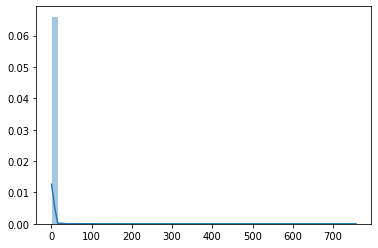

In [23]:
sns.distplot(test.groupby('userid').size())

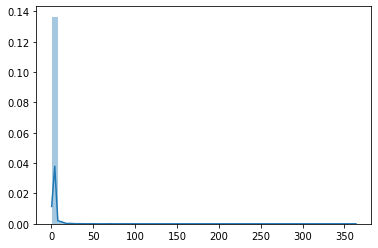

In [24]:
sns.distplot(train.groupby('userid').size())

In [18]:
np.intersect1d(test['userid'],train['userid'])

array([], dtype=object)

In [11]:
submission[:3]

,orderid,proba
0,0,0.011203
1,1,0.008736
2,2,0.035003
